# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Data import

In [3]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [4]:
#df_verseny_public_train

In [5]:
#df_verseny_public_train.describe()

In [6]:
#df_verseny_public_train.columns

# PCA

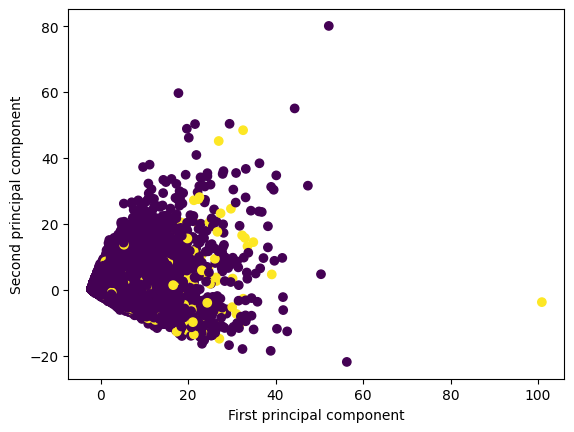

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

X_pca

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')

plt.xlabel('First principal component')

plt.ylabel('Second principal component')


plt.show()

# Feature importance

## Decision Tree

In [8]:
"""X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()"""

'X = df_verseny_public_train.drop([\'target\', \'cookie_id\'], axis=1)\ny = df_verseny_public_train[\'target\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nclf = DecisionTreeClassifier()\n\nclf.fit(X_train, y_train)\n\nimportances = clf.feature_importances_\n\nindices = np.argsort(importances)[::-1]\n\nprint("Feature ranking:")\nfor f in range(X.shape[1]):\n    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))\n\n\nplt.figure()\nplt.title("Feature importances")\nplt.bar(range(X.shape[1]), importances[indices],\n       color="r", align="center")\nplt.xticks(range(X.shape[1]), indices)\nplt.xlim([-1, X.shape[1]])\nplt.show()'

## Random forest

In [9]:
"""clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()"""

'clf_rf = RandomForestClassifier()\n\nclf_rf.fit(X_train, y_train)\n\n\nimportances_rf = clf_rf.feature_importances_\n\n\nindices_rf = np.argsort(importances_rf)[::-1]\n\nprint("Feature ranking:")\nfor f in range(X.shape[1]):\n    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))\n\nplt.figure()\nplt.title("Feature importances (Random Forest)")\nplt.bar(range(X.shape[1]), importances_rf[indices_rf],\n       color="r", align="center")\nplt.xticks(range(X.shape[1]), indices_rf)\nplt.xlim([-1, X.shape[1]])\nplt.show()'

In [10]:
"""dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)"""

'dt_feature_importances = pd.DataFrame({\'Feature\': indices, \'Importance_DT\': importances[indices]})\nrf_feature_importances = pd.DataFrame({\'Feature\': indices_rf, \'Importance_RF\': importances_rf[indices_rf]})\n\nmerged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on=\'Feature\')\n\nprint("Merged Feature Importances:")\nprint(merged_feature_importances)'

In [11]:
"""percentile_threshold = 0.8

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)"""


'percentile_threshold = 0.8\n\nimportance_threshold_dt = merged_feature_importances[\'Importance_DT\'].quantile(percentile_threshold)\nimportance_threshold_rf = merged_feature_importances[\'Importance_RF\'].quantile(percentile_threshold)\n\nprint("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)'

In [12]:
"""merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)"""

'merged_feature_importances = merged_feature_importances[(merged_feature_importances[\'Importance_DT\'] > importance_threshold_dt) & (merged_feature_importances[\'Importance_RF\'] > importance_threshold_rf)]\nprint("Merged Feature Importances:")\nprint(merged_feature_importances)'

## Dropping the feature which are not in the percentile

In [13]:
"""X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)"""


"X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)"

In [14]:
"""len(X.columns)"""

'len(X.columns)'

In [15]:
"""X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"""

'X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)'

# PCA train test dataset

In [16]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Modell building - Random forest and AdaBoost with Voting

## Using 80 percentil dataset

In [17]:
"""from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

base_rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=12, random_state=42, criterion='entropy', max_features='log2', oob_score=True, verbose=1)
base_ada = AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1.5)

voting_clf = VotingClassifier(estimators=[('rf', base_rf), ('ada', base_ada)], voting='soft', verbose=True)

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)"""


'from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier\nfrom sklearn.metrics import accuracy_score\n\nbase_rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=12, random_state=42, criterion=\'entropy\', max_features=\'log2\', oob_score=True, verbose=1)\nbase_ada = AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1.5)\n\nvoting_clf = VotingClassifier(estimators=[(\'rf\', base_rf), (\'ada\', base_ada)], voting=\'soft\', verbose=True)\n\nvoting_clf.fit(X_train, y_train)\n\ny_pred_voting = voting_clf.predict(X_test)\n\naccuracy_voting = accuracy_score(y_test, y_pred_voting)\nprint("Accuracy (Voting Classifier):", accuracy_voting)'

## Using PCA

In [18]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

base_rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=12, random_state=42, criterion='entropy', max_features='log2', oob_score=True, verbose=1)
base_ada = AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1.5)

voting_clf = VotingClassifier(estimators=[('rf', base_rf), ('ada', base_ada)], voting='soft', verbose=True)

voting_clf.fit(X_train_pca, y_train_pca)

y_pred_voting = voting_clf.predict(X_test_pca)

accuracy_voting = accuracy_score(y_test_pca, y_pred_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.8s finished


[Voting] ....................... (1 of 2) Processing rf, total=   6.1s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[Voting] ...................... (2 of 2) Processing ada, total=   6.9s


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.1s finished


Accuracy (Voting Classifier): 0.98525


# Test set

In [19]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

# Evaluation

## Using 80 percentil

In [20]:
"""X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test_test = X_test_test.drop(X_test_test.columns.difference(X.columns), axis=1)

y_pred_rf = voting_clf.predict_proba(X_test_test)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_80_param.csv', index=False)"""

"X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)\n\nX_test_test = X_test_test.drop(X_test_test.columns.difference(X.columns), axis=1)\n\ny_pred_rf = voting_clf.predict_proba(X_test_test)[:, 1]\n\ndf_verseny_public_test['target'] = y_pred_rf\n\ndf_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]\n\ndf_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_80_param.csv', index=False)"

## Using PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_test_test)

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

y_pred_rf = voting_clf.predict_proba(X_pca)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_PCA.csv', index=False)

#gatya

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.2s finished
